In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder , OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

#Upload dataset
from google.colab import files
uploaded = files.upload()

#read dataset
df = pd.read_csv('depression_data_clean.csv')


Saving depression_data_clean.csv to depression_data_clean.csv


Dataset Shape: (408611, 16)

First 5 rows:
               Name  Age Marital Status    Education Level  \
0  Christine Barker   31        Married  Bachelor's Degree   
1  Jacqueline Lewis   55        Married        High School   
2    Shannon Church   78        Widowed    Master's Degree   
3    Charles Jordan   58       Divorced    Master's Degree   
4      Michael Rich   18         Single        High School   

   Number of Children Smoking Status Physical Activity Level  \
0                   2     Non-smoker                  Active   
1                   1     Non-smoker               Sedentary   
2                   1     Non-smoker               Sedentary   
3                   3     Non-smoker                Moderate   
4                   0     Non-smoker               Sedentary   

  Employment Status     Income Alcohol Consumption Dietary Habits  \
0        Unemployed   26265.67            Moderate       Moderate   
1          Employed   42710.36                High      Unhea

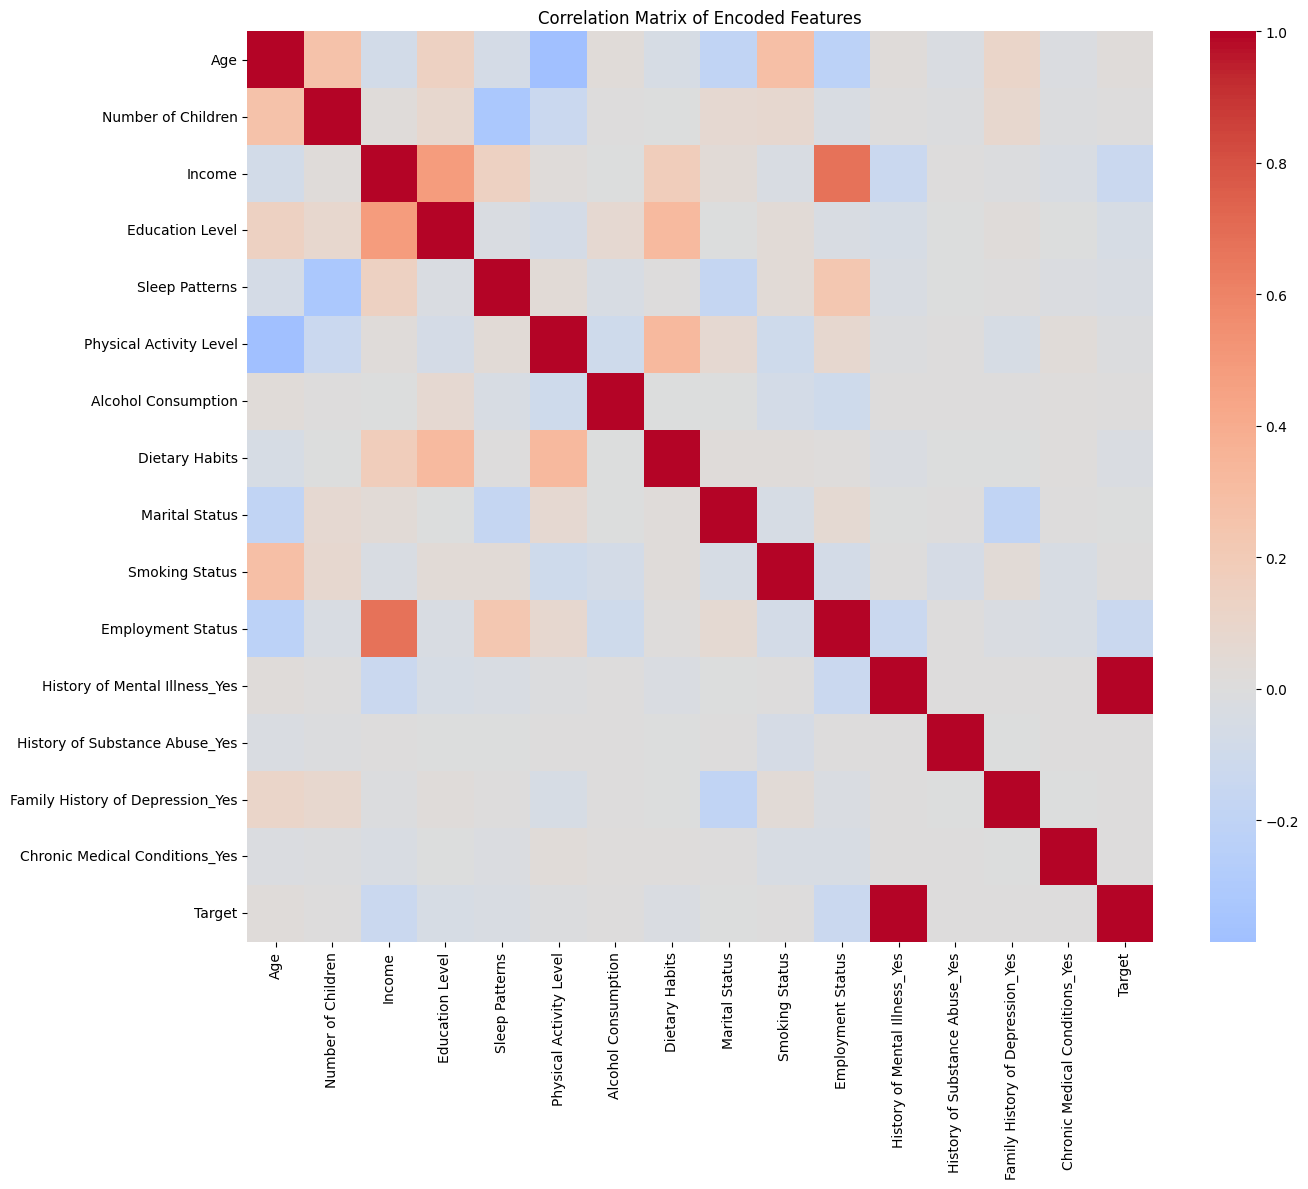


Encoded dataset saved as 'depression_data_encoded.csv'

Encoding Summary:
Original dataset shape: (408611, 16)
Encoded dataset shape: (408611, 16)
Number of numerical features: 3
Number of ordinal encoded features: 8
Number of one-hot encoded features: 4
Total features after encoding: 15

Ordinal Encoding Scheme:
Education Level (0=High School, 1=Associate Degree, 2=Bachelor's Degree, 3=Master's Degree, 4=PhD):
  ['High School', 'Associate Degree', "Bachelor's Degree", "Master's Degree", 'PhD']

Sleep Patterns (0=Poor, 1=Fair, 2=Good):
  ['Poor', 'Fair', 'Good']

Physical Activity Level (0=Sedentary, 1=Moderate, 2=Active):
  ['Sedentary', 'Moderate', 'Active']

Alcohol Consumption (0=Low, 1=Moderate, 2=High):
  ['Low', 'Moderate', 'High']

Dietary Habits (0=Unhealthy, 1=Moderate, 2=Healthy):
  ['Unhealthy', 'Moderate', 'Healthy']

Marital Status (0=Widowed, 1=Divorced, 2=Single, 3=Married):
  ['Widowed', 'Divorced', 'Single', 'Married']

Smoking Status (0=Current, 1=Former, 2=Non-smok

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# Display basic info
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Define categorical and numerical columns
categorical_cols = ['Marital Status', 'Education Level', 'Smoking Status',
                   'Physical Activity Level', 'Employment Status',
                   'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
                   'History of Mental Illness', 'History of Substance Abuse',
                   'Family History of Depression', 'Chronic Medical Conditions']

numerical_cols = ['Age', 'Number of Children', 'Income']

# Custom encoding mapping for ordinal variables based on potential mental health impact
education_order = ['High School', 'Associate Degree', 'Bachelor\'s Degree', 'Master\'s Degree', 'PhD']
sleep_order = ['Poor', 'Fair', 'Good']
activity_order = ['Sedentary', 'Moderate', 'Active']
alcohol_order = ['Low', 'Moderate', 'High']
diet_order = ['Unhealthy', 'Moderate', 'Healthy']
marital_order = ['Widowed', 'Divorced', 'Single', 'Married']
smoking_order = ['Current', 'Former', 'Non-smoker']
employment_order = ['Unemployed', 'Employed']

# Create a preprocessor with column transformer, **without any scaling**
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat_ordinal', OrdinalEncoder(categories=[education_order, sleep_order,
                                                 activity_order, alcohol_order,
                                                 diet_order, marital_order,
                                                 smoking_order, employment_order]),
         ['Education Level', 'Sleep Patterns', 'Physical Activity Level',
          'Alcohol Consumption', 'Dietary Habits', 'Marital Status',
          'Smoking Status', 'Employment Status']),
        ('cat_onehot', OneHotEncoder(drop='first', sparse_output=False),
         ['History of Mental Illness', 'History of Substance Abuse',
          'Family History of Depression', 'Chronic Medical Conditions'])
    ],
    remainder='drop'
)

# Apply the preprocessing
X_encoded = preprocessor.fit_transform(df)

# Get feature names after transformation
# For numerical features
num_features = numerical_cols

# For ordinal encoded features
ordinal_features = ['Education Level', 'Sleep Patterns', 'Physical Activity Level',
                    'Alcohol Consumption', 'Dietary Habits', 'Marital Status',
                    'Smoking Status', 'Employment Status']

# For one-hot encoded features
onehot_features = []
# We need to get the feature names from the OneHotEncoder transformer
onehot_transformer = preprocessor.named_transformers_['cat_onehot']
onehot_feature_names = onehot_transformer.get_feature_names_out(
    ['History of Mental Illness', 'History of Substance Abuse',
     'Family History of Depression', 'Chronic Medical Conditions']
)
onehot_features = list(onehot_feature_names)

# Combining all feature names
all_feature_names = num_features + ordinal_features + onehot_features

# Creating a DataFrame with the encoded features
df_encoded = pd.DataFrame(X_encoded, columns=all_feature_names)

# Adding the target variable
df_encoded['Target'] = df['History of Mental Illness'].map({'Yes': 1, 'No': 0})

print("\nEncoded Dataset Shape:", df_encoded.shape)
print("\nFirst 5 rows of encoded dataset:")
print(df_encoded.head())

# Correlation heatmap
plt.figure(figsize=(14, 12))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Encoded Features')
plt.tight_layout()
plt.show()

# Save the encoded dataset
df_encoded.to_csv('depression_data_encoded.csv', index=False)
print("\nEncoded dataset saved as 'depression_data_encoded.csv'")

# Display encoding summary
print("\nEncoding Summary:")
print("="*50)
print(f"Original dataset shape: {df.shape}")
print(f"Encoded dataset shape: {df_encoded.shape}")
print(f"Number of numerical features: {len(numerical_cols)}")
print(f"Number of ordinal encoded features: {len(ordinal_features)}")
print(f"Number of one-hot encoded features: {len(onehot_features)}")
print(f"Total features after encoding: {len(all_feature_names)}")

# Complete encoding scheme used
print("\nOrdinal Encoding Scheme:")
print("="*50)
print("Education Level (0=High School, 1=Associate Degree, 2=Bachelor's Degree, 3=Master's Degree, 4=PhD):")
print(f"  {education_order}")
print("\nSleep Patterns (0=Poor, 1=Fair, 2=Good):")
print(f"  {sleep_order}")
print("\nPhysical Activity Level (0=Sedentary, 1=Moderate, 2=Active):")
print(f"  {activity_order}")
print("\nAlcohol Consumption (0=Low, 1=Moderate, 2=High):")
print(f"  {alcohol_order}")
print("\nDietary Habits (0=Unhealthy, 1=Moderate, 2=Healthy):")
print(f"  {diet_order}")
print("\nMarital Status (0=Widowed, 1=Divorced, 2=Single, 3=Married):")
print(f"  {marital_order}")
print("\nSmoking Status (0=Current, 1=Former, 2=Non-smoker):")
print(f"  {smoking_order}")
print("\nEmployment Status (0=Unemployed, 1=Employed):")
print(f"  {employment_order}")

files.download('depression_data_encoded.csv')